In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# importar datosd

In [2]:
old = pd.read_csv('sargento-old-080918.csv', header=None, skiprows=2 )
old.head()

,0,1,2,3,4
0,1,08/16/2018 12:30:00,104.359,29.252,-0.340
1,2,08/16/2018 12:45:00,104.243,28.754,-0.351
2,3,08/16/2018 13:00:00,104.255,28.655,-0.350
3,4,08/16/2018 13:15:00,104.239,28.655,-0.352
4,5,08/16/2018 13:30:00,104.255,28.655,-0.350


In [3]:
pd.read_csv?

In [4]:
canal = pd.read_csv('sargento-canal.csv', header=None, skiprows=1)
canal.head()

,0,1,2,3,4
0,1,08/16/2018 11:15:01,112.032,29.152,0.360
1,2,08/16/2018 11:30:02,111.990,27.567,0.356
2,3,08/16/2018 11:45:03,111.928,27.272,0.350
3,4,08/16/2018 12:00:04,111.899,27.173,0.347
4,5,08/16/2018 12:15:05,111.870,27.075,0.344


In [5]:
salinidad=pd.read_csv('salinidad_080918.csv', header=None, skiprows=2)
salinidad.head()

,0,1,2,3,4,5,6
0,1,08/16/2018 12:45:00,33686,54525.5,28.54,50942.8,33.4310
1,2,08/16/2018 13:00:00,33686,54525.5,28.43,51048.0,33.5085
2,3,08/16/2018 13:15:00,33686,54525.5,28.35,51124.8,33.5651
3,4,08/16/2018 13:30:00,33686,54525.5,28.31,51163.3,33.5935
4,5,08/16/2018 13:45:00,33686,54525.5,28.28,51192.2,33.6148


# Trabajo de datos

In [6]:
canal.columns = ['#','Fecha','Presion','Temp','Nivel']
canal.head()

,#,Fecha,Presion,Temp,Nivel
0,1,08/16/2018 11:15:01,112.032,29.152,0.360
1,2,08/16/2018 11:30:02,111.990,27.567,0.356
2,3,08/16/2018 11:45:03,111.928,27.272,0.350
3,4,08/16/2018 12:00:04,111.899,27.173,0.347
4,5,08/16/2018 12:15:05,111.870,27.075,0.344


In [7]:
old.columns = ['#','Fecha','Presion','Temp','Nivel']
old.head()

,#,Fecha,Presion,Temp,Nivel
0,1,08/16/2018 12:30:00,104.359,29.252,-0.340
1,2,08/16/2018 12:45:00,104.243,28.754,-0.351
2,3,08/16/2018 13:00:00,104.255,28.655,-0.350
3,4,08/16/2018 13:15:00,104.239,28.655,-0.352
4,5,08/16/2018 13:30:00,104.255,28.655,-0.350


In [8]:
salinidad.columns = ['#','Fecha','Presion','Temp','Nivel','conductancia especifica, s/cm,','sal, ppt',]
old.head()

,#,Fecha,Presion,Temp,Nivel
0,1,08/16/2018 12:30:00,104.359,29.252,-0.340
1,2,08/16/2018 12:45:00,104.243,28.754,-0.351
2,3,08/16/2018 13:00:00,104.255,28.655,-0.350
3,4,08/16/2018 13:15:00,104.239,28.655,-0.352
4,5,08/16/2018 13:30:00,104.255,28.655,-0.350


# cambiar formato de fecha a tiempo

In [9]:
canal['Fecha'] = pd.to_datetime(canal['Fecha'])
canal.dtypes

#                   int64
Fecha      datetime64[ns]
Presion           float64
Temp              float64
Nivel             float64
dtype: object

In [10]:
old['Fecha'] = pd.to_datetime(old['Fecha'])
old.dtypes

#                   int64
Fecha      datetime64[ns]
Presion           float64
Temp              float64
Nivel             float64
dtype: object

In [11]:
salinidad['Fecha'] = pd.to_datetime(salinidad['Fecha'])
salinidad.dtypes

#                                          int64
Fecha                             datetime64[ns]
Presion                                    int64
Temp                                     float64
Nivel                                    float64
conductancia especifica, s/cm,           float64
sal, ppt                                 float64
dtype: object

# Datos de la estacion, del canal y de la salinidad

In [16]:
#un dia
diacanal = canal[(canal['Fecha'] > '09/07/2018 00:04') &  (canal['Fecha'] < '09/07/2018 23:51')]

diaold = old[(old['Fecha'] < '09/07/2018 23:45')& (old['Fecha'] > '09/07/2018 00:00')] 

diasal = salinidad[(salinidad['Fecha'] <'09/07/2018 23:45')&( salinidad['Fecha']>'09/07/2018 00:00')]

In [17]:
diacanal.head()

,#,Fecha,Presion,Temp,Nivel
2066,2067,2018-09-07 00:19:00,119.499,27.173,1.103
2067,2068,2018-09-07 00:34:00,119.369,27.173,1.090
2068,2069,2018-09-07 00:49:00,119.083,27.173,1.062
2069,2070,2018-09-07 01:04:00,118.667,27.173,1.020
2070,2071,2018-09-07 01:19:00,118.160,27.173,0.970


In [18]:
diaold['Fecha'].head()

2063   2018-09-07 00:15:00
2064   2018-09-07 00:30:00
2065   2018-09-07 00:45:00
2066   2018-09-07 01:00:00
2067   2018-09-07 01:15:00
Name: Fecha, dtype: datetime64[ns]

In [19]:
diacanal['Fecha'].head()

2066   2018-09-07 00:19:00
2067   2018-09-07 00:34:00
2068   2018-09-07 00:49:00
2069   2018-09-07 01:04:00
2070   2018-09-07 01:19:00
Name: Fecha, dtype: datetime64[ns]

In [20]:
diasal.head()

,#,Fecha,Presion,Temp,Nivel,"conductancia especifica, s/cm,","sal, ppt"
2062,2063,2018-09-07 00:15:00,33686,54525.5,28.27,51201.8,33.6219
2063,2064,2018-09-07 00:30:00,33686,54525.5,28.27,51201.8,33.6219
2064,2065,2018-09-07 00:45:00,33686,54525.5,28.27,51201.8,33.6219
2065,2066,2018-09-07 01:00:00,33686,54525.5,28.27,51201.8,33.6219
2066,2067,2018-09-07 01:15:00,33686,54525.5,28.28,51192.2,33.6148


# gráfica de niveles de mar del sensor junto a la estación y el del canal

In [17]:
#un dia
import plotly.plotly as py
import plotly.graph_objs as go

trace1 = go.Scatter(
    x=diaold['Fecha'],
    y=diaold['Nivel'],
    name='estacion',
)
trace2 = go.Scatter(
    x=diaold['Fecha'],
    y=diacanal['Nivel'],
    name='canal',
    yaxis='y2'
)
data = [trace1, trace2]
layout = go.Layout(
    title=' niveles de mar del sensor junto a la estación y el del canal de un dia',
    yaxis=dict(
        title='nivel del mar en la estacion'
    ),
    yaxis2=dict(
        title='nivel del mar en el canal',
        titlefont=dict(
            color='rgb(148, 103, 189)'
        ),
        tickfont=dict(
            color='rgb(148, 103, 189)'
        ),
        overlaying='y',
        side='right'
    )
)
fig = go.Figure(data=data, layout=layout)
plot_url = py.plot(fig, filename='multiple-axes-double')

# Gráfica de salinidad y nivel de mar del sensor junto a la estación. 

In [18]:
diasal.head()

,#,Fecha,Presion,Temp,Nivel,"conductancia especifica, s/cm,","sal, ppt"
2062,2063,2018-09-07 00:15:00,33686,54525.5,28.27,51201.8,33.6219
2063,2064,2018-09-07 00:30:00,33686,54525.5,28.27,51201.8,33.6219
2064,2065,2018-09-07 00:45:00,33686,54525.5,28.27,51201.8,33.6219
2065,2066,2018-09-07 01:00:00,33686,54525.5,28.27,51201.8,33.6219
2066,2067,2018-09-07 01:15:00,33686,54525.5,28.28,51192.2,33.6148


In [19]:
#un dia
import plotly.plotly as py
import plotly.graph_objs as go

trace1 = go.Scatter(
    x=diaold['Fecha'],
    y=diaold['Nivel'],
    name='nivel',
)
trace2 = go.Scatter(
    x=diaold['Fecha'],
    y=diasal['sal, ppt'],
    name='salinidad',
    yaxis='y2'
)
data = [trace1, trace2]
layout = go.Layout(
    title=' salinidad y nivel de mar del sensor en la estación de un dia',
    yaxis=dict(
        title='nivel'
    ),
    yaxis2=dict(
        title='salinidad',
        titlefont=dict(
            color='rgb(148, 103, 189)'
        ),
        tickfont=dict(
            color='rgb(148, 103, 189)'
        ),
        overlaying='y',
        side='right'
    )
)
fig = go.Figure(data=data, layout=layout)
plot_url = py.plot(fig, filename='multiple-axes-double')

# Gráfica de temperatura de agua entre el sensor junto a la estación y el del canal. 

In [20]:
#un dia
import plotly.plotly as py
import plotly.graph_objs as go

trace1 = go.Scatter(
    x=diaold['Fecha'],
    y=diaold['Temp'],
    name='estacion',
)
trace2 = go.Scatter(
    x=diaold['Fecha'],
    y=diacanal['Temp'],
    name='canal',
    yaxis='y2'
)
data = [trace1, trace2]
layout = go.Layout(
    title='Gráfica de temperatura de agua entre el sensor junto a la estación y el del canal de un ida',
    yaxis=dict(
        title='Temperatura en el sensor de la estacion'
    ),
    yaxis2=dict(
        title='Temperatura en el sensor del canal',
        titlefont=dict(
            color='rgb(148, 103, 189)'
        ),
        tickfont=dict(
            color='rgb(148, 103, 189)'
        ),
        overlaying='y',
        side='right'
    )
)
fig = go.Figure(data=data, layout=layout)
plot_url = py.plot(fig, filename='multiple-axes-double')

# correlación entre el nivel de agua y la salinidad: correlation matrix python heat map

In [ ]:
nivel= diasal['Nivel']
sal= diasal['sal, ppt']
sal.head()

In [36]:
 A = [[[diasal['Nivel']], [diasal['sal, ppt']] ]]
print(A)

[[[2062    28.27
2063    28.27
2064    28.27
2065    28.27
2066    28.28
2067    28.27
2068    28.27
2069    28.22
2070    28.21
2071    28.21
2072    28.19
2073    28.19
2074    28.19
2075    28.19
2076    28.21
2077    28.19
2078    28.19
2079    28.21
2080    28.21
2081    28.21
2082    28.21
2083    28.21
2084    28.22
2085    28.22
2086    28.22
2087    28.22
2088    28.22
2089    28.22
2090    28.24
2091    28.24
        ...  
2126    28.27
2127    28.25
2128    28.22
2129    28.21
2130    28.19
2131    28.18
2132    28.18
2133    28.18
2134    28.16
2135    28.18
2136    28.16
2137    28.16
2138    28.16
2139    28.16
2140    28.16
2141    28.16
2142    28.16
2143    28.18
2144    28.18
2145    28.18
2146    28.18
2147    28.18
2148    28.18
2149    28.18
2150    28.18
2151    28.18
2152    28.18
2153    28.21
2154    28.22
2155    28.24
Name: Nivel, Length: 94, dtype: float64], [2062    33.6219
2063    33.6219
2064    33.6219
2065    33.6219
2066    33.6148
2067    33.6219
2068

In [37]:
A.corr()

AttributeError: 'list' object has no attribute 'corr'

In [28]:
datoscorr= {'Nivel del agua':nivel,
 'Salinidad':sal}


NameError: name 'nivel' is not defined

In [25]:
matrizcorr = pd.DataFrame(datoscorr, columns = ['nivel de agua', 'salinidad'])
matrizcorr.head()

NameError: name 'datoscorr' is not defined

In [44]:
 d = {'salinidad': diasal['sal, ppt'], 'nivel del agua': diasal['Nivel']}
df = pd.DataFrame(data=d)
df


,salinidad,nivel del agua
2062,33.6219,28.27
2063,33.6219,28.27
2064,33.6219,28.27
2065,33.6219,28.27
2066,33.6148,28.28
2067,33.6219,28.27
2068,33.6219,28.27
2069,33.6574,28.22
2070,33.6646,28.21
2071,33.6646,28.21


In [45]:
df.corr()

,salinidad,nivel del agua
salinidad,1.000000,-0.999999
nivel del agua,-0.999999,1.000000


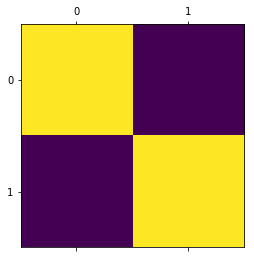

In [47]:
import matplotlib.pyplot as plt

plt.matshow(df.corr())